# Systemy uczące się - Zad. dom. 2: Naiwny klassyfikator Bayesa

### Autor rozwiązania
Uzupełnij poniższe informacje umieszczając swoje imię i nazwisko oraz numer indeksu:


In [1]:
NAME = "Wojciech Kot"
ID = "151879"

Ten notebook zawiera dwa zadania związane z klasyfikatorem naiwnego Bayesa, oprócz implementacji zawiera on równie pytania na które trzeba odpowiedzieć.

## Zadanie 1
Zadanie polega na implementacji klasyfikatora naiwnego Bayesa dla zmiennych ciągłych gdzie za rozkłady cechy przyjmij rozkłady normalne.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use("ggplot")

Do testowania twojego rozwiązania użyj trzech generatorów danych sztucznych `generate1`, `generate2` oraz `generate3` (funkcje te przyjmują jako argument liczbę elementów do wygenerowania z każdej klasy - domyślnie $N=100$). Sposób ich wywołania jest przedstawiony poniżej:

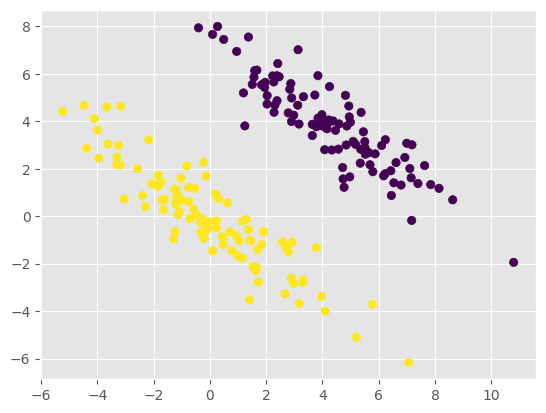

In [3]:
from helpers import generate1, generate2, generate3  # noqa

x, y = generate2()
plt.scatter(x[:, 0], x[:, 1], c=y)

W implementacji będzie przydatna klasa `norm` z pakietu `scipy`, która zwraca wartości funkcji gęstości prawdopodobieństwa rozkładu normalnego dla zmiennych ciągłych.

In [4]:
from scipy.stats import norm

# (x, mean, std)
norm.pdf(5, 0, 1)  # gęstość prawd. dla 5 z rozkładu standardowego
norm.logpdf(5, 0, 1)  # logarytm gęstości prawd. dla 5 z rozkładu standardowego

-13.418938533204672

Zaimplementuj klasyfikator naiwnego Bayesa dla zmiennych ciągłych. Pamiętaj o zabezpieczniu się przed problemem wynikającym z mnożenia wielu małych liczb (prawdopodobieństw).

In [5]:
class GaussianNaiveBayes():
    def __init__(self) -> None:
        self.means = {}
        # Słownik, który docelowo powinien zawierać tablicę/wektor warunkowych średnich dla każdego atrybutu
        # Każda tablica/wektor powinna być typu np.array
        # np. 1) means[1] powinno zawierać wektor średnich wartości atrybutów  dla klasy o indeksie 1
        #     2) means[0][1] powinno zawierać średnią 1 atrybutu dla klasy o indeksie 0
        # (Możesz spróbować zaimplementować efektywniejszą implementację używając macierzy)
        self.stds = {}
        # Analogiczna struktura dla odchyleń standardowych
        self.class_log_prob = None
        # Wektor zawierający logarytmy prawdopodobieństwa dla każdej z klas
        # np. class_log_prob[1] zawiera logarytm prawdopodobieństwa, że klasa jest równa 1 P(C=1)

    def fit(self, x: np.ndarray, y: np.ndarray) -> None:
        """Funkcja trenująca klasyfikator naiwnego Bayesa na podstawie danych x i y.

        Args:
            x (np.ndarray): macierz danych wejściowych, gdzie każdy wiersz to obserwacja
            y (np.ndarray): wektor indeksów klas (0 lub 1) dla każdej obserwacji

        Returns:
            None
        """
        # TWÓJ KOD TUTAJ - proces uczenia czyli uzupełniania struktur zainicjaliowanych w init()
        #                  odpowiednimi wartościami
        classes = np.unique(y)
        self.class_log_prob = {}

        for c in classes:
            xc = x[y == c]  # Wybór próbek danej klasy
            self.means[c] = np.mean(xc, axis=0)
            self.stds[c] = np.std(xc, axis=0, ddof=1)  # Odchylenie standardowe
            self.class_log_prob[c] = np.log(len(xc) / len(y))  # Logarytm prawdopodobieństwa klasy

    def predict_proba(self, x: np.ndarray) -> np.ndarray:
        """Funkcja zwracająca prawdopodobieństwa przynależności do klas dla każdej obserwacji w macierzy x.

        Args:
            x (np.ndarray): macierz danych wejściowych, gdzie każdy wiersz to obserwacja

        Returns:
            np.ndarray: macierz o dwóch kolumnach (dwie klasy) w której kolejne wiersze  zawierają prawdopodobieństwa P(c|x)
                przynależności dla klas dla kolejnych obserwacji w macierzy x

        """
        # TWÓJ KOD TUTAJ - predykcja - zwrócenie prawdopodobieństwa dla każdej klasy i każdej obserwacji
        probs = np.zeros((x.shape[0], len(self.class_log_prob))) # lenn(class_log_prob) da liczbę klas których jesteśmy nauczeni.
        for c in self.class_log_prob:
            mean, std = self.means[c], self.stds[c]
            log_prob = self.class_log_prob[c]  # Logarytm P(C)
            class_conditional = np.sum(norm.logpdf(x, mean, std), axis=1)
            probs[:, c] = log_prob + class_conditional

        probs = np.exp(probs - np.max(probs, axis=1, keepdims=True))  # Normalizacja log-prob
        probs /= probs.sum(axis=1, keepdims=True)  # Przekształcenie do prawdopodobieństw [0-1]
        return probs

    def predict(self, x: np.ndarray) -> np.ndarray:
        # Gotowa funkcja wybierająca klasę z największym prawdopodobieństwem
        prob = self.predict_proba(x)
        return np.argmax(prob, axis=1)


Przetestuj twój klasyfikator na wygenerowanych wcześniej danych.

In [6]:
gnb = GaussianNaiveBayes()
gnb.fit(x, y)

# Trafność na zbiorze uczącym
np.mean(gnb.predict(x) == y)

1.0

Narysowanie nauczonego klasyfikatora

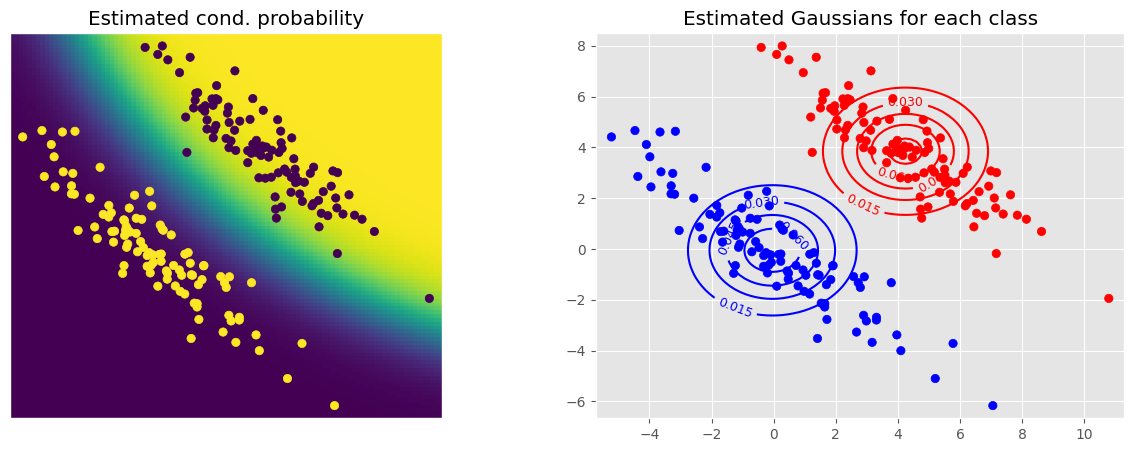

In [7]:
from helpers import plot_gaussian_bayes

plot_gaussian_bayes(x, y, gnb)

Użyj funkcji do generowania danych, aby wygenerować zbiór testowy oraz sprawdź na nim trafność klasyfikacji metody.

In [8]:
x_test, y_test = generate1(1000)
np.mean(gnb.predict(x_test) == y_test)

0.9915

Trafność na zbiorze uczącym - generator 1 -  1.0


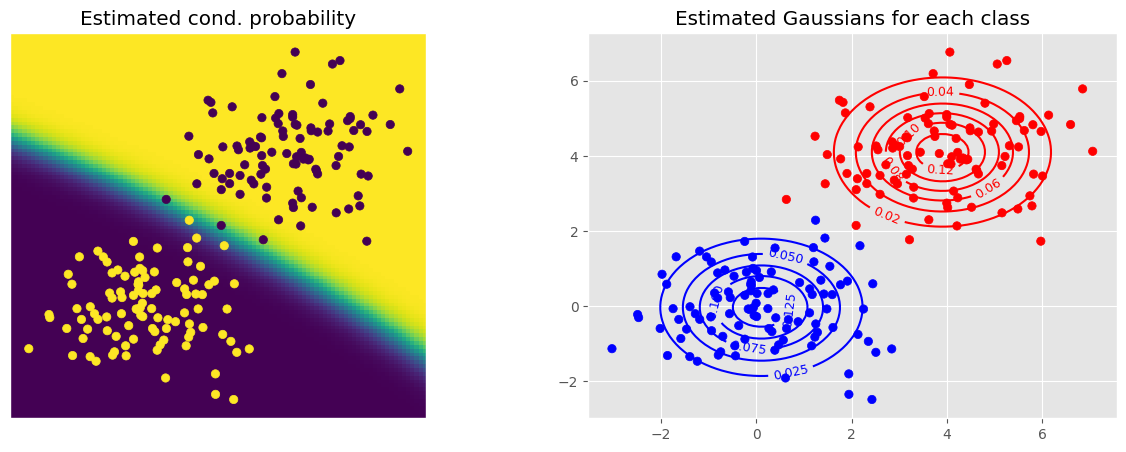

Trafność na zbiorze testowym - generator 1 -  0.9895


In [9]:
x, y = generate1()
# plt.scatter(x[:, 0], x[:, 1], c=y)

gnb1 = GaussianNaiveBayes()
gnb1.fit(x, y)

# Trafność na zbiorze uczącym
print("Trafność na zbiorze uczącym - generator 1 - ", np.mean(gnb1.predict(x) == y))

plot_gaussian_bayes(x, y, gnb1)

x_test, y_test = generate1(1000)
print("Trafność na zbiorze testowym - generator 1 - ", np.mean(gnb1.predict(x_test) == y_test))

Trafność na zbiorze uczącym - generator 2 -  0.99


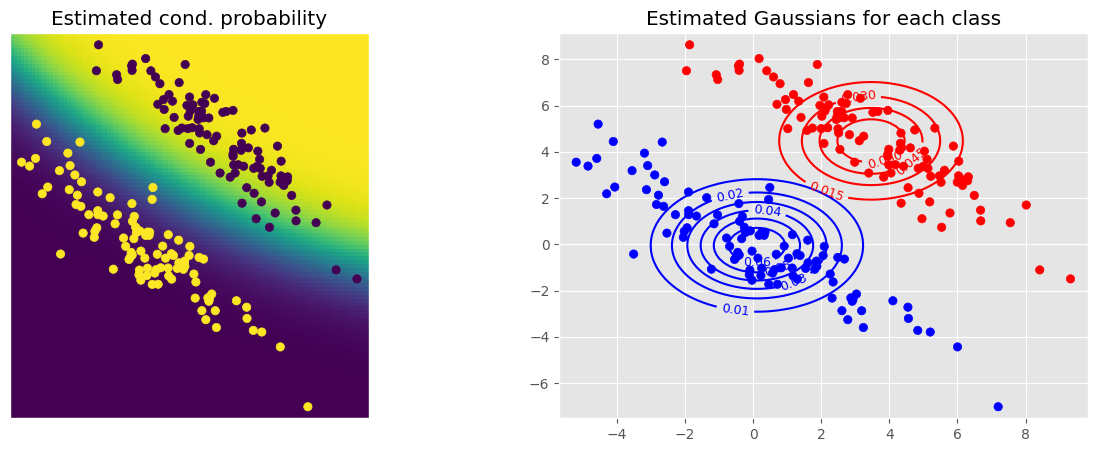

Trafność na zbiorze testowym - generator 2 -  0.9935


In [10]:
x, y = generate2()
# plt.scatter(x[:, 0], x[:, 1], c=y)

gnb2 = GaussianNaiveBayes()
gnb2.fit(x, y)

# Trafność na zbiorze uczącym
print("Trafność na zbiorze uczącym - generator 2 - ", np.mean(gnb2.predict(x) == y))

plot_gaussian_bayes(x, y, gnb2)

x_test, y_test = generate2(1000)
print("Trafność na zbiorze testowym - generator 2 - ", np.mean(gnb2.predict(x_test) == y_test))

Trafność na zbiorze uczącym - generator 3 -  0.85


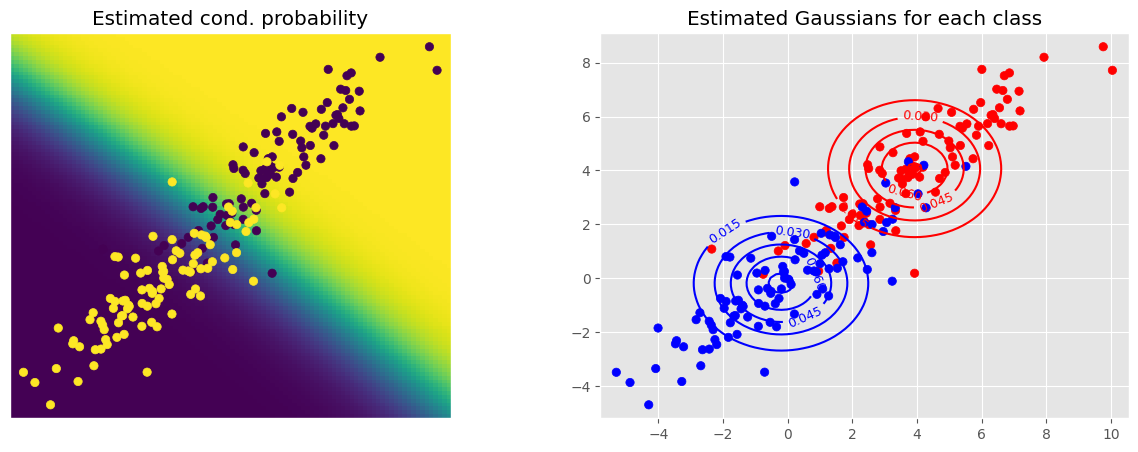

Trafność na zbiorze testowym - generator 3 -  0.825


In [11]:
x, y = generate3()
# plt.scatter(x[:, 0], x[:, 1], c=y)

gnb3 = GaussianNaiveBayes()
gnb3.fit(x, y)

# Trafność na zbiorze uczącym
print("Trafność na zbiorze uczącym - generator 3 - ", np.mean(gnb3.predict(x) == y))

plot_gaussian_bayes(x, y, gnb3)

x_test, y_test = generate3(1000)
print("Trafność na zbiorze testowym - generator 3 - ", np.mean(gnb3.predict(x_test) == y_test))

In [12]:
from helpers import GaussianBayes

x, y = generate1()
gb = GaussianNaiveBayes()
gb.fit(x, y)
x_test, y_test = generate1(1000)
print("Trafność na zbiorze uczącym - helpers - ", np.mean(gb.predict(x) == y))
print("Trafność na zbiorze testowym - helpers - ", np.mean(gb.predict(x_test) == y_test))

x, y = generate2()
gb = GaussianNaiveBayes()
gb.fit(x, y)
x_test, y_test = generate2(1000)
print("Trafność na zbiorze uczącym - helpers2 - ", np.mean(gb.predict(x) == y))
print("Trafność na zbiorze testowym - helpers2 - ", np.mean(gb.predict(x_test) == y_test))

x, y = generate3()
gb = GaussianNaiveBayes()
gb.fit(x, y)
x_test, y_test = generate3(1000)
print("Trafność na zbiorze uczącym - helpers3 - ", np.mean(gb.predict(x) == y))
print("Trafność na zbiorze testowym - helpers3 - ", np.mean(gb.predict(x_test) == y_test))

Trafność na zbiorze uczącym - helpers -  0.99
Trafność na zbiorze testowym - helpers -  0.9905
Trafność na zbiorze uczącym - helpers2 -  1.0
Trafność na zbiorze testowym - helpers2 -  0.9995
Trafność na zbiorze uczącym - helpers3 -  0.83
Trafność na zbiorze testowym - helpers3 -  0.8295


**Ćwiczenia**
 - Pamiętaj o przetestowaniu Twojego algorytmu dla wszystkich trzech generatorów danych. W których ze zbiorów założenie o warunkowej niezależności zmiennych jest spełnione? Jak brak spełnienia tego założenia wpływa na działanie klasyfikatora?
 - Z pliku `helpers` zaimportuj klasę `GaussianBayes` (identyczna obsługa jak tej zaimplementowanej przez Ciebie). Klasa implementuje algorytm Bayesa bez założenia o niezależności zmiennych (ale z założeniem o normalności rozkładów). Porównaj wyniki - szczególnie dla zbiorów dla których założenie o warunkowej niezależności zmiennych nie jest spełnione.
 - Klasyfikatora `GaussianBayes` nie można wytrenować na zbiorach które mają mniej niż 3 przykłady dla każdej z klas. Jak myślisz dlaczego? Jak ten problem będzie się zmieniał dla zbiorów o wysokiej liczbie cech?
 - Nawet używając klasyfikatora `GaussianBayes`, który zakłada kompletny model zależności i prawidłowy rozkład danych (nasze dane są generowane z rozkładów normalnych) - często nie jest w stanie uzyskać 100% trafności nawet na zbiorze uczącym. Jak myślisz, dlaczego?
 - Czy gdyby przepisać do klasyfikatora prawdziwe wartości średnich i macierz wariancji-kowariancji cech (z generatora) - uzyskalibyśmy 100% trafność? Co możemy powiedzieć o takim klasyfikatorze? Czy jest możliwe uzyskanie klasyfikatora bardziej trafnego niż taki?

 Odpowiedzi na dwa ostatnie pytania zostaną sprawdzone: wpisz swoje odpowiedzi poniżej.

[miejsce na odpowiedzi]
1. Zbiory 2. i 3. nie spełniają założenia o warunkowej niezależności zmiennych.
Nie ma to dużego wpływu na jakość klasyfikacji. Główny powód niedokładności klasyfikacji na zbiorze 3. jest powiązany z bliskością obu klas, a nawet z nachodzeniem klas na siebie -> stąd, "wspólny" rejon powoduje nietrafne klasyfikacje.

2. Wyniki dla GaussianBayes z pliku helpers jak i zaimplementowanego tutaj są bardzo zbliżone, niezaleznie od zbioru

3. 3 przykłady to i tak niesamowicie mało, aby uzyskać jakąkolwiek klasyfikację. Zakładam że może to być granica ze względu na to, że potrzebujemy więcej niż 1 reprezentanta każdej z klas, z powodu tego jak liczony jest logit (we wzorze pojawia się n/(n-1) ; stąd, gdy n, jako ilość reprezentantów jakiejś klasy wyniesie 1, uzyskamy błąd dzielenia przez 0.

4-5. W przypadku danych, których średnie są dostatecznie zbliżone z wariancjami dość dużymi, aby generowane dane były bardzo zbliżone do siebie nie sposób zaklasyfikować danej wartości ze 100% pewnością. Nawet klasyfikator znający pierwotne średnie nie będzie w stanie dokładnie w 100% trafnie zaklasyfikować wyników trafiających blisko środka odległości pomiędzy znanymi średnimi (istnieje duże prawdopodobieństwo że należą do jednej, jak i drugiej klasy).

# Zadanie 2
Klasyfikator naiwnego Bayesa często jest używany do klasyfikacji tekstów. Przetestuj działanie algorytmów na podanym rzeczywistym zbiorze danych:
> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Podany zbiór jest wieloklasowy, więc poniższy kod wybiera z niego podzbiór postów tylko z dwóch tematów.

In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)

vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None)  # Przekształcenie tekstu na cechy binarne
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
vectors = vectors.toarray()
vectors_test = vectors_test.toarray()

Dokumenty w zbiorze można wyświetlić w następujący sposób.

In [14]:
newsgroups_train.data[0:3]

['From: ab@nova.cc.purdue.edu (Allen B)\nSubject: Re: thining algorithm\nOrganization: Purdue University\nLines: 15\n\nIn article <1q7615INNmi@shelley.u.washington.edu> kshin@stein.u.washington.edu  \n(Kevin Shin) writes:\n> I am trying obtain program to preprocess handwriting characters.\n> Like thining algorithm, graph alogrithm.\n> Do anyone know where I can obtain those?\n\nI usually use "Algorithms for graphics and image processing" by\nTheodosios Pavlidis, but other people here got them same idea and now\n3 of 4 copies in the libraries have been stolen!\n\nAnother reference is "Digital Image Processing" by Gonzalez and\nWintz/Wood, which is widely available but a little expensive ($55\nhere- I just checked today).\n\nab\n',
 "From: stephens@geod.emr.ca (Dave Stephenson)\nSubject: Re: Clementine Science Team Selected\nNntp-Posting-Host: ngis.geod.emr.ca\nOrganization: Dept. of Energy, Mines, and Resources, Ottawa\nLines: 32\n\nnickh@CS.CMU.EDU (Nick Haines) writes:\n\n>In article 

Analogicznie możemy uzyskać dostęp do informacji o klasach.

In [15]:
newsgroups_train.target[0:3]

array([0, 1, 0])

i do "zbinaryzowanego" tekstu

In [16]:
vectors[0:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Wytrenuj klasyfikator Naiwnego Bayesa z rozmywaniem estymat (patrz pakiet `sklearn`) i sprawdż jego trafność na zbiorze uczącym i testowym.

In [17]:

# TWÓJ KOD TUTAJ
# Stworzenie i nauczenie modelu
# Ewaluacja na zbiorze testowym

from sklearn.naive_bayes import MultinomialNB

# gnb = GaussianNaiveBayes()
# gnb.fit(vectors, newsgroups_train.target)

mnb = MultinomialNB()
mnb.fit(vectors, newsgroups_train.target)

# print("Trafność na zbiorze uczącym gnb - ", np.mean(gnb.predict(vectors) == newsgroups_train.target))
# print("Trafność na zbiorze testowym gnb - ", np.mean(gnb.predict(vectors_test) == newsgroups_test.target))

print("Trafność na zbiorze uczącym mnb - ", np.mean(mnb.predict(vectors) == newsgroups_train.target))
print("Trafność na zbiorze testowym mnb - ", np.mean(mnb.predict(vectors_test) == newsgroups_test.target))

Trafność na zbiorze uczącym mnb -  0.9957519116397621
Trafność na zbiorze testowym mnb -  0.9616858237547893


**Ćwiczenia**
 - Dlaczego klasyfikator Naiwnego Bayesa dość dobrze sprawdza się do powyższego zadania i analogicznych?
 - Przeanalizuj wartości estymat prawdopodobieństw. Które cechy/słowa są najlepszymi wskaźnikami dla podanych klas? Jakie słowa bardzo słabo wskazują na którąkolwiek z klas?
 - Czy byłoby możliwe wytrenowanie równie skutecznego klasyfikatora z mniejszą liczbą cech? W jaki sposób można by to uzyskać?
 - Analizowany zbiór jest oryginalnie wieloklasowy z tego powodu możemy go wykorzystać do wielu testów wybierając różne pary klas. Pełna lista tematów: 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
 - Czy są pary tematów dla których ten klasyfikator działa znacząco gorzej?
 - Jakie są zalety stosowania klasyfikatora Bayesa dla tego problemu (i w ogólności)? Czy do tego problemu sprawdziłyby się reguły lub drzewa decyzyjne? Dlaczego?

 Odpowiedzi na kropki 1, 3 i 6 wpisz poniżej - zostaną sprawdzone.

[miejsce na odpowiedzi]

1- klasyfikator Naiwnego Bayesa dobrze sprawdzi się do takich zadań klasyfikacji z racji na to, że znacznie lepiej uogólnia od klasyfikatorów drzewiastych. W przypadku tekstu, którego nigdy wcześniej nie widział będzie w stanie przewidzieć klasę na podstawie jakiegoś znanego mu słowa, lub słowa podobnego do mu już znanego (a więc działa dobrze, mimo treningu na stosunkowo małej próbce danych). Dodatkowo, klasyfikatory NB są dość tanie obliczeniowo, znacznie tańsze niż np. sieci neuronowe, gdyby zaprzęgać je do tego samego zadania.


3- Stemming, Lemantyzacja oraz usuwanie najczęstszych słow.
Po pierwsze, lepszą jakość możnaby uzyskać usuwając niepotrzebne informacje ze zdań, a więc słowa takie jak spójniki (bardzo częste (angielskie) "and", "or", "but" itp) oraz po prostu częste słowa w jakimś języku, nie niosące ze sobą informacji o temacie zdania. Dodatkowo, uproszczenie słow do ich bazowej formy:
 "Ala ma kota i papugi" -> ["ala", "mieć", "kot", "papuga"]
Następnym krokiem byłoby skorzystanie z Bag of Words, a więc sprowadzenie tego do wektora cech... ale tego już aż tak dobrze nie pamiętam z pjn ze studiów inżynierskich...

6-  
Wady stosowania podejścia drzewiastego w tym problemie:
- klątwa wymiarowości - model szybko stanie się niesamowicie złożony i najpewniej przeuczony)
- niejednoznaczność języka (ciężko znaleźć twarde reguły, np. jeśli jest słowo gwiazda -> to tekst o astronomii (mimo, że chodziło o gwiazdy jako celebrytów))
- kiepska generalizacja - jako skutek dwóch poprzednich problemów

Za to zaletami stosowania podejścia wykorzystującego klasyfikator Bayesa:

- dobra generalizacja - dobrze radzi sobie z brakującymi danymi
- dobra klasyfikacja wieloklasowa - nie ma problemu z większą ilością klas, gdyż wyliczy prawdopodobieństwo do każdej z nich. klątwa wymiarowości uderza w klasyfikatory Bayesa znacznie słabiej niż w klasyfikatory drzewiaste.
